In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    pipeline,
)

In [2]:
def display_confusion_matrix(labels, label_predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(labels, label_predictions))
    disp.plot(cmap=plt.cm.Reds)
    plt.title("Confusion matrix", color="red")
    plt.xlabel('Predicted Label',color='black')
    plt.ylabel('True Label',color='black')
    plt.gcf().axes[0].tick_params(color="black")
    plt.gcf().axes[1].tick_params(color="black")
    plt.gcf().set_size_inches(10,6)

In [3]:
test_data = pd.read_csv("../data/processed/test.csv")
features = test_data.drop(["completion"], axis=1)
labels = test_data["completion"]

In [4]:
label_mapping = {
    'Clinical pharmacology': 0,
    'Dental care': 1,
    'Emergency medical care': 2,
    'General medical care': 3,
    'Infectious disease care': 4,
    'Internal medicine care': 5,
    'Laboratory services': 6,
    'Nuclear medicine': 7,
    'Occupational and sports medicine': 8,
    'Oncological care': 9,
    'Ophthalmological care': 10,
    'Otorhinolaryngological care': 11,
    'Pediatric care': 12,
    'Physical medicine and rehabilitation': 13,
    'Psychological and psychiatric care': 14,
    'Radiological diagnostics': 15,
    'Reproductive medicine': 16,
    'Specialized clinics': 17,
    'Surgical care': 18,
    "Women's health": 19
 }

In [5]:
labels.value_counts()

completion
5     11
2     10
3     10
6      9
17     8
7      8
15     7
19     7
4      7
11     7
10     6
9      5
12     5
18     5
13     5
8      5
0      5
1      4
16     4
14     4
Name: count, dtype: int64

### Random Forest

In [6]:
model = joblib.load("../models/randomforest.pkl")
label_predictions = model.predict(features)

Standard metrics

In [7]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.75      0.60         4
           2       0.75      0.90      0.82        10
           3       0.50      0.30      0.37        10
           4       1.00      1.00      1.00         7
           5       0.55      0.55      0.55        11
           6       1.00      0.89      0.94         9
           7       0.78      0.88      0.82         8
           8       1.00      1.00      1.00         5
           9       0.67      0.80      0.73         5
          10       1.00      1.00      1.00         6
          11       1.00      0.43      0.60         7
          12       1.00      0.80      0.89         5
          13       0.71      1.00      0.83         5
          14       1.00      0.75      0.86         4
          15       0.78      1.00      0.88         7
          16       0.50      0.50      0.50         4
          17       0.78    

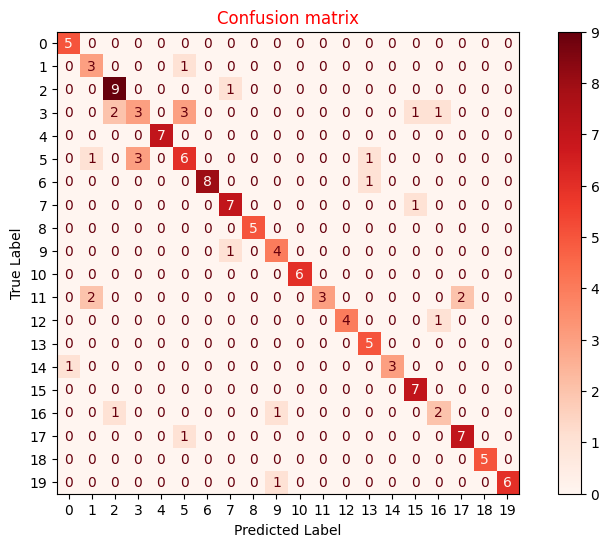

In [8]:
display_confusion_matrix(labels, label_predictions)

### Logistic Regression

In [9]:
model = joblib.load("../models/logreg.pkl")
label_predictions = model.predict(features)

Standard metrics

In [10]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      1.00      0.89         4
           2       1.00      0.70      0.82        10
           3       0.60      0.60      0.60        10
           4       0.78      1.00      0.88         7
           5       0.50      0.55      0.52        11
           6       1.00      0.67      0.80         9
           7       0.78      0.88      0.82         8
           8       1.00      1.00      1.00         5
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         6
          11       0.75      0.43      0.55         7
          12       1.00      0.80      0.89         5
          13       0.56      1.00      0.71         5
          14       0.60      0.75      0.67         4
          15       0.88      1.00      0.93         7
          16       1.00      0.75      0.86         4
          17       0.88    

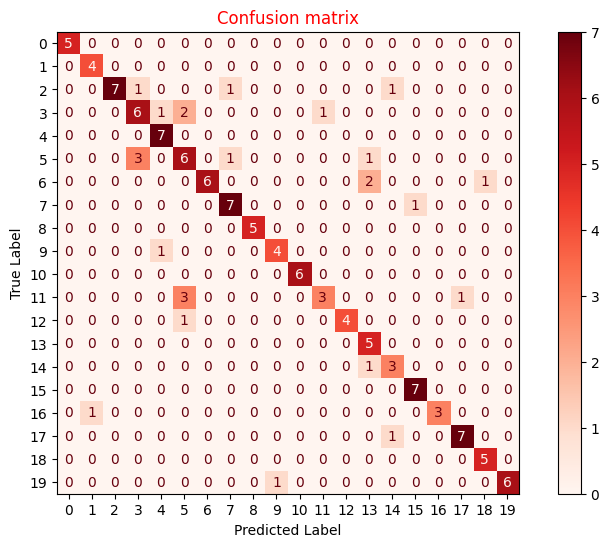

In [11]:
display_confusion_matrix(labels, label_predictions)

### Multinomial Naive Bayes

In [12]:
model = joblib.load("../models/multinomialnb.pkl")
label_predictions = model.predict(features)

Standard metrics

In [13]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.60      0.75      0.67         4
           2       0.67      0.60      0.63        10
           3       0.20      0.10      0.13        10
           4       0.46      0.86      0.60         7
           5       0.62      0.45      0.53        11
           6       1.00      0.33      0.50         9
           7       0.50      0.75      0.60         8
           8       0.40      0.80      0.53         5
           9       0.75      0.60      0.67         5
          10       0.67      0.33      0.44         6
          11       0.38      0.43      0.40         7
          12       1.00      0.80      0.89         5
          13       0.30      0.60      0.40         5
          14       0.33      0.25      0.29         4
          15       0.86      0.86      0.86         7
          16       0.50      0.25      0.33         4
          17       0.54    

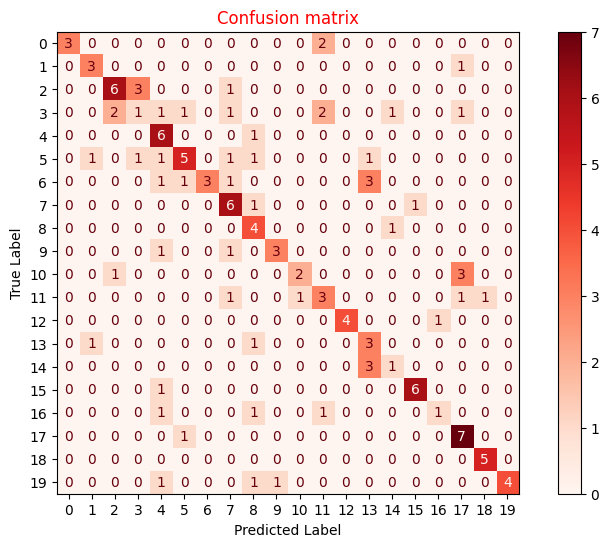

In [14]:
display_confusion_matrix(labels, label_predictions)

### XGBoost

In [15]:
model = joblib.load("../models/xgboost.pkl")
label_predictions = model.predict(features)

Standard metrics

In [16]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.75      0.75         4
           2       0.89      0.80      0.84        10
           3       0.29      0.20      0.24        10
           4       1.00      0.86      0.92         7
           5       0.47      0.64      0.54        11
           6       1.00      0.78      0.88         9
           7       0.86      0.75      0.80         8
           8       0.57      0.80      0.67         5
           9       0.80      0.80      0.80         5
          10       0.50      0.67      0.57         6
          11       0.67      0.29      0.40         7
          12       0.33      0.20      0.25         5
          13       0.75      0.60      0.67         5
          14       0.67      0.50      0.57         4
          15       0.88      1.00      0.93         7
          16       0.40      0.50      0.44         4
          17       0.54    

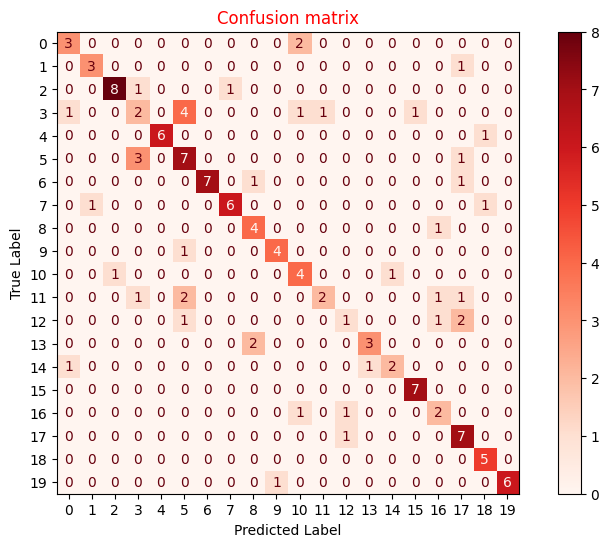

In [17]:
display_confusion_matrix(labels, label_predictions)

### BioBERT

In [18]:
#test_data = pd.read_csv("../data/processed/test_bert.csv")

In [19]:
#model = BertForSequenceClassification.from_pretrained("../models/biobert", num_labels=8)
#tokenizer = BertTokenizer.from_pretrained("../models/biobert/tokenizer")
#pipe = pipeline(task="text-classification", model=model, tokenizer=tokenizer)
#label_predictions = pipe(test_data["text"].tolist())

In [20]:
#label_predictions = [int(label["label"][-1]) for label in label_predictions]

Standard metrics

In [21]:
#print(classification_report(labels, label_predictions))

In [22]:
#display_confusion_matrix(labels, label_predictions)